<div align="center">

#  **Bangalore House Price Prediction Model**

---

### _Machine Learning Project — Real Estate Price Estimation_

</div>



## 📦 **Tools and Libraries Used:**

- **Pandas** – Data cleaning & manipulation  
- **NumPy** – Numerical operations  
- **Matplotlib** – Data visualization
- **Machine Learning Algorithm** - Linear Regression  
- **Scikit-Learn**  
  - Train–test split  
  - Linear Regression model  



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

### Removing Unwanted Columns


In [4]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

### We can drop all rows containing NA values (We have large amount of data)

In [6]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### 3 BHK and 3 bedroom are both same thing, so creating a new row for bhk

In [8]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\Dell\AppData\Local\Temp\ipykernel_3196\3847263516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [9]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

#### We can see that a house can not have 43 bedrooms. 

In [11]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


#### There cannot be 43 bedrooms in 2400 sq ft, means there's an error 

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


#### These many rows have square feet value in range

In [14]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

### Some values are in range. Ex: 1133 - 1384. Making a function to change all values in float

In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
convert_sqft_to_num('1500') 

1500.0

In [17]:
convert_sqft_to_num('1500 - 2500') 

2000.0

In [18]:
convert_sqft_to_num('1500 square foot') 

In [19]:
df4 = df3.copy()

In [20]:
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)

In [21]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
df4[~df4['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk


### No sqft value in range is left

In [23]:
df5 = df4.copy()

In [24]:
df5['price_per_sqft']=df5['price']/df5['total_sqft']*100000

In [25]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
print(df5.location.unique())

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [27]:
print(len(df5.location.unique()))  #Not 242 before next code execution

1304


In [28]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

## Top 10 most common locations.

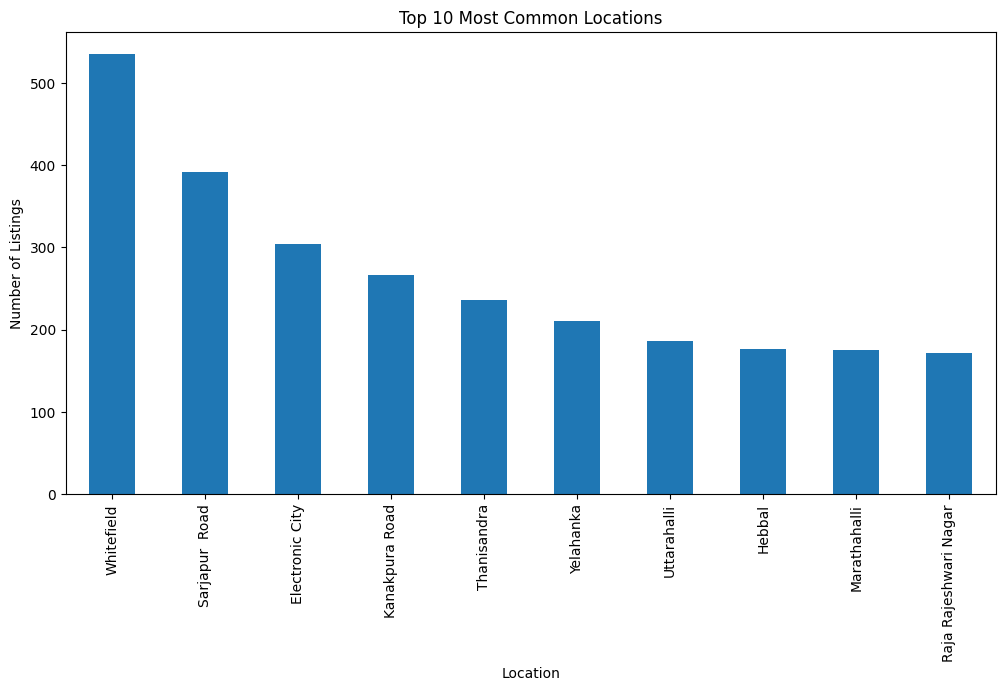

In [29]:
plt.figure(figsize=(12,6))
location_stats[:10].plot(kind='bar')
plt.title("Top 10 Most Common Locations")
plt.xlabel("Location")
plt.ylabel("Number of Listings")
plt.show()


In [30]:
len(location_stats[location_stats<=10])

1052

In [31]:
locations_less_than_10 = location_stats[location_stats<=10]
locations_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [32]:
df5.location = df5.location.apply(lambda x: 'others' if x in locations_less_than_10 else x)
len(df5.location.unique())

242

In [33]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [34]:
df5[df5.total_sqft / df5.bhk <300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,others,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


### We need to remove these because 1 room cannot be less than 300 sqft, hence they are outliers

In [35]:
df5.shape

(13246, 7)

In [36]:
df6 = df5[~(df5.total_sqft / df5.bhk <300)]

In [37]:
df6.shape

(12502, 7)

In [39]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### We need to remove rows having price per sqft extreme low & high.

In [40]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby ('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st) )]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [41]:
df7 = remove_outliers(df6)
df7.shape

(10241, 7)

### Checking data where price of 2 bhk house is greater than 3 bhk house for same location.

In [42]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green' ,label='3BHK', s=50)
    plt.xlabel("Total Square feet")
    plt.ylabel("Price Per Square Feet" )
    plt.title(location)
    plt.legend()

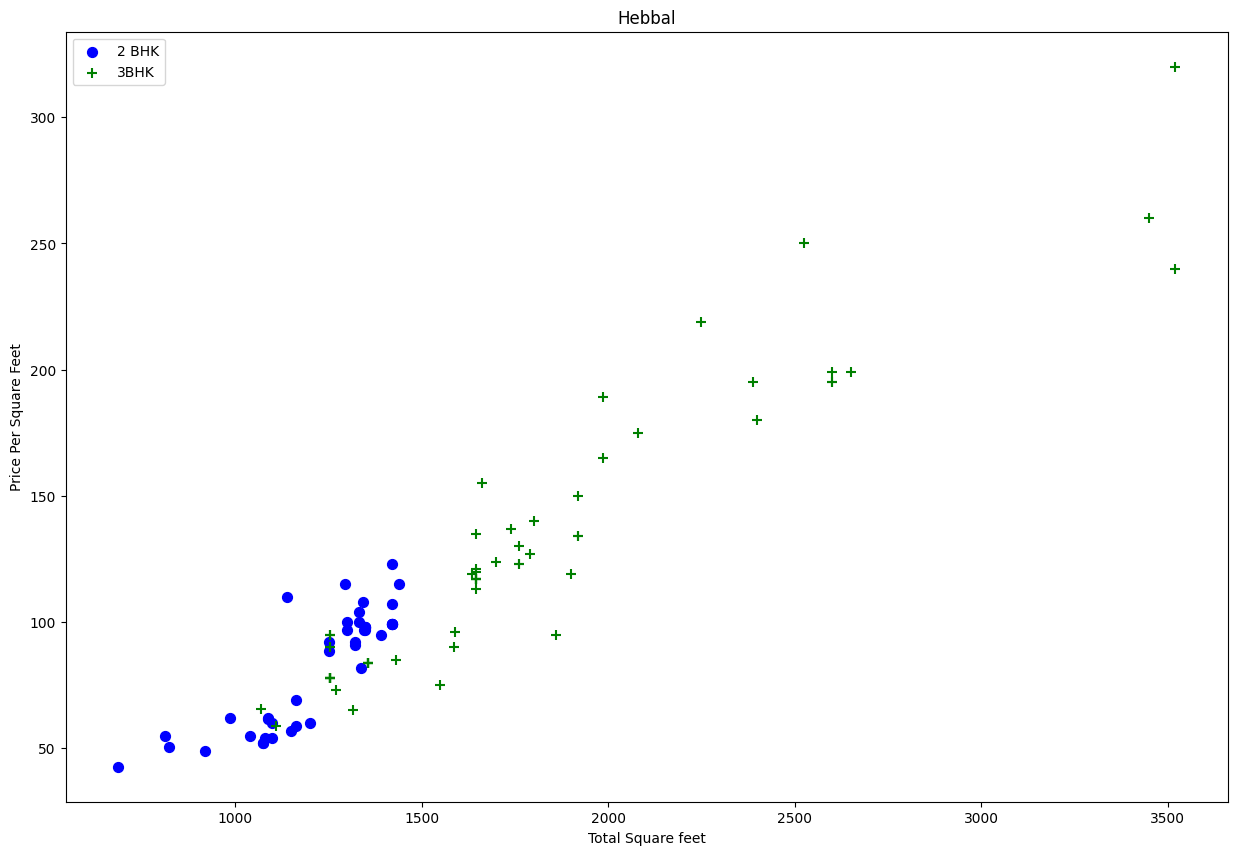

In [43]:
plot_scatter_chart(df7, 'Hebbal')

### Removing Outliers where price of n bhk house is greater than n-1 bhk house for same location.

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array ([])
    for location, location_df in df.groupby ('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby ('bhk'):
            bhk_stats [bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count' ]>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                                 
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape                                                   

(7329, 7)

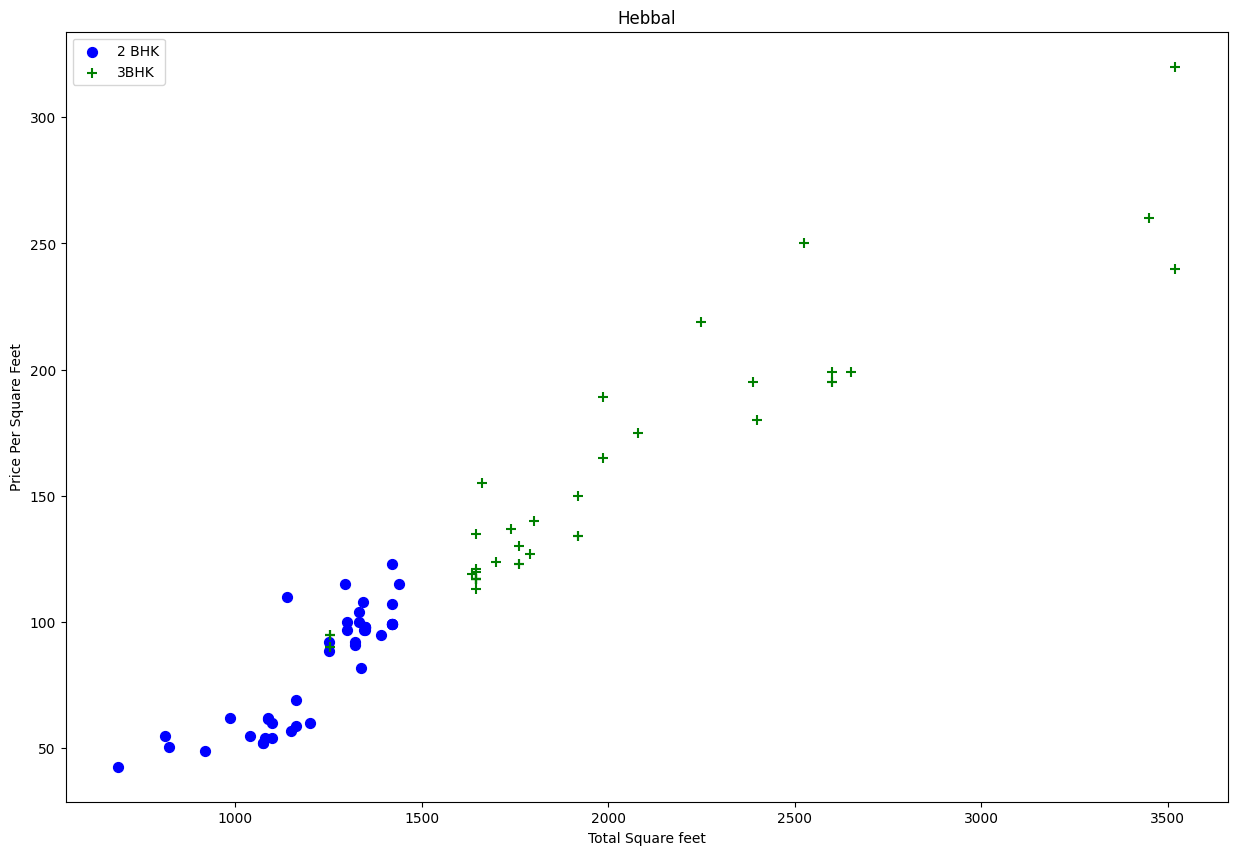

In [45]:
plot_scatter_chart(df8, 'Hebbal')

### Removing data having too much bathrooms

In [46]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
df9 = df8[df8.bath<df8.bhk+2]
print(df9.shape)
df9.head()

(7251, 7)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


### Price vs Total Sqft comparision

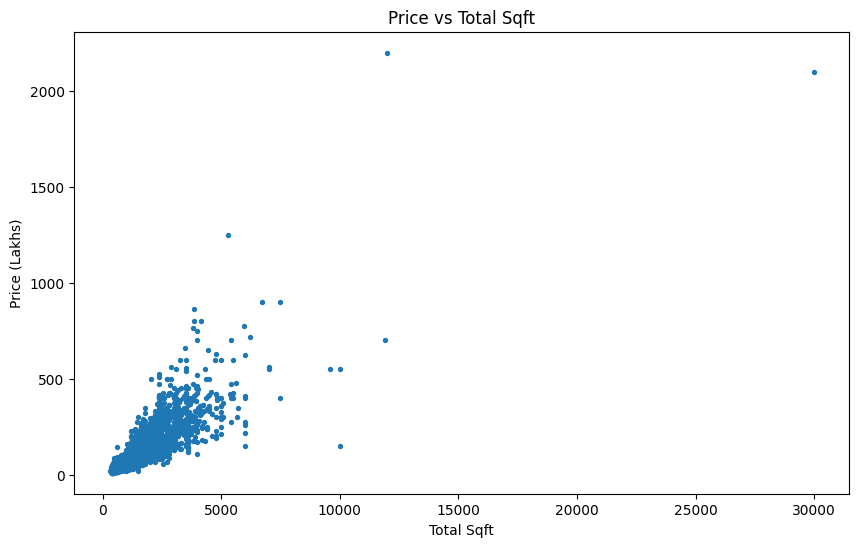

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(df9.total_sqft, df9.price, s=8)
plt.xlabel("Total Sqft")
plt.ylabel("Price (Lakhs)")
plt.title("Price vs Total Sqft")
plt.show()

### Correlation Heatmap

This heatmap shows how our key numerical features relate to each other.  
A higher correlation (closer to 1) means the two values move together more strongly.



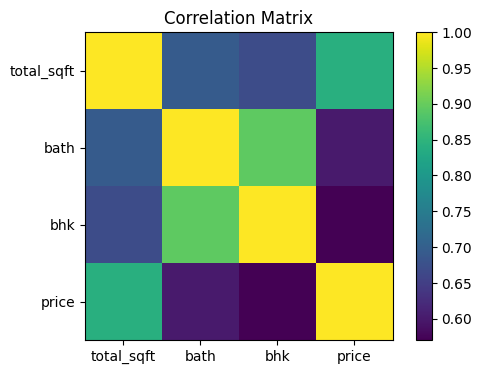

In [79]:
plt.figure(figsize=(6,4))
plt.imshow(df12[['total_sqft','bath','bhk','price']].corr(), cmap='viridis')
plt.colorbar()
plt.xticks(range(4), ['total_sqft','bath','bhk','price'])
plt.yticks(range(4), ['total_sqft','bath','bhk','price'])
plt.title("Correlation Matrix")
plt.show()

### Now dropping unneccessary columns left

In [48]:
df10=df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Starting the process to make the data good to fit for Machine learning model.

### Converting the location column into dummies as Machine Learning model cannot process text data.

In [49]:
dummies = pd.get_dummies(df10.location, dtype=int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df11=pd.concat([df10,dummies.drop('others', axis='columns')], axis='columns')

In [51]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12 = df11.drop('location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df12.columns  # Were not in lower case earlier

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [54]:
df12.columns = [col.lower() for col in df12.columns]
df12.head()

,total_sqft,bath,price,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
x = df12.drop('price', axis='columns')
y = df12.price

### **--> X and Y is the ready data to feed any model.**

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10) # Random state for same split everytime

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.8452277697874319

In [58]:
# def predict_price(location, sqft, bath, bhk):
#     x_data=df12.drop('price', axis='columns')
#     y = df12.price
#     loc_index = np.where(x_data.columns==location)[0][0]

#     x = np.zeros(len(x.columns))
#     x[0] = sqft
#     x[1] = bath
#     x[2] = bhk
#     if loc_index >= 0:
#         x[loc_index]=1

#     # Convert to DataFrame with correct feature names
#     x_df = pd.DataFrame([x], columns=x_data.columns)
    
#     return lr_clf.predict([x_df])[0]

In [81]:
def predict_price(location, sqft, bath, bhk):
    x_data = df12.drop('price', axis='columns')  # Renamed 'x' to 'x_data'
    y = df12.price
    loc_index = np.where(x_data.columns == location)[0][0] if location in x_data.columns else -1

    x = np.zeros(len(x_data.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    x_df = pd.DataFrame([x], columns=x_data.columns)

    return lr_clf.predict(x_df)[0]  


In [60]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st block jayanagar',
       '1st phase jp nagar', '2nd phase judicial layout',
       '2nd stage nagarbhavi', '5th block hbr layout', '5th phase jp nagar',
       '6th phase jp nagar',
       ...
       'vijayanagar', 'vishveshwarya layout', 'vishwapriya layout',
       'vittasandra', 'whitefield', 'yelachenahalli', 'yelahanka',
       'yelahanka new town', 'yelenahalli', 'yeshwanthpur'],
      dtype='object', length=244)

In [61]:
#np.where(x.columns=='1st Phase JP Nagar')[0][0]

In [62]:
lr_clf.score(x_test, y_test)

0.8452277697874319

### **Finally the model is ready to predict the price using Linear Regression (with Approx 85% Accuracy) :**

#### Pass Arguments in this order:  Location, Square_feet, Bathrooms, BHK

In [63]:
predict_price('1st Phase JP Nagar',1000,2,2)

np.float64(81.88929546001162)

In [64]:
predict_price('1st Phase JP Nagar', 1500, 3, 3)

np.float64(124.90312960249345)

In [65]:
predict_price('Indira Nagar', 1000, 3, 3)

np.float64(85.19544264027802)

### Now Exporting the model to a pickle file to use in python flask server.

In [66]:
import pickle
with open('home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

### Exporting the columns data to a json file:

In [67]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))